In [1]:
# import logging
import os
import re
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import torch
import yaml
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.mushroom import Mushroom
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils

In [5]:
visium_config = {
    'dtype': 'visium',
#     'sections': config,
    'chkpt_filepath': None,
    'sae_kwargs': {
        'size': 256,
        'patch_size': 32,
        'encoder_dim': 256,
        'kl_scaler': .0001,
        'recon_scaler': 1.,
        'neigh_scaler': 0.001,
        'codebook_size': 100,
        'decoder_dims': (256, 1000, 5000,)
    },
    'learner_kwargs': {
        'scale': .1,
        'pct_expression': .02,
        'batch_size': 64,
        'num_workers': 1,
        'device': 'cpu',
#         'channels': channels,
#         'channel_mapping': channel_mapping
    },
    'train_kwargs': {
        'num_iters': 10000,
        'lr': 1e-4,
        'log_every': 10,
        'save_every': 500,
#         'save_dir': chkpt_dir       
    },
}

In [6]:
config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml'

case = config_fp.split('/')[-2]
out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/testing/mushroom/{case}_vae_vq_visium/outputs')

config = yaml.safe_load(open(config_fp))

chkpt_dir = os.path.join(out_dir, 'chkpts')
Path(chkpt_dir).mkdir(parents=True, exist_ok=True)

In [33]:
visium_config['sections'] = config
visium_config['train_kwargs']['save_dir'] = chkpt_dir
visium_config['chkpt_filepath'] = os.path.join(chkpt_dir, 'final.pt')

In [34]:
mushroom = Mushroom.from_config(visium_config)

INFO:root:using device: cpu
INFO:root:generating inputs for visium tissue sections
INFO:root:using 11622 channels
INFO:root:2 sections detected: ['s0', 's3']
INFO:root:processing sections
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:learner initialized


In [35]:
mushroom.embed_sections()

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

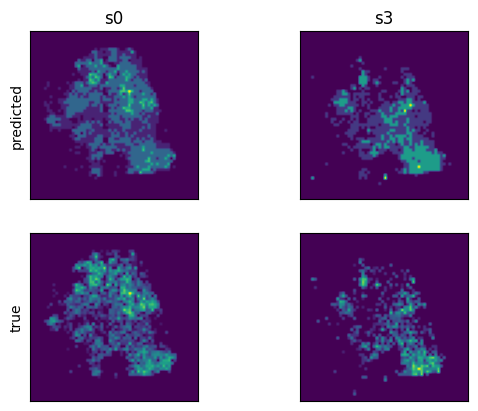

In [36]:
mushroom.display_predicted_pixels(channel='EPCAM')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

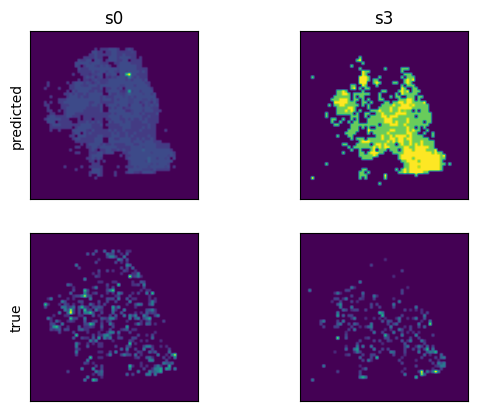

In [37]:
mushroom.display_predicted_pixels(channel='PTPRC')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

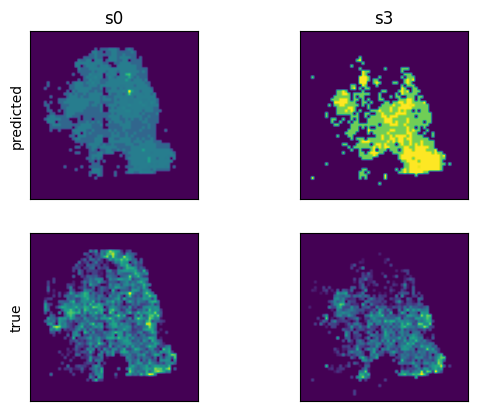

In [38]:
mushroom.display_predicted_pixels(channel='HLA-DRA')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

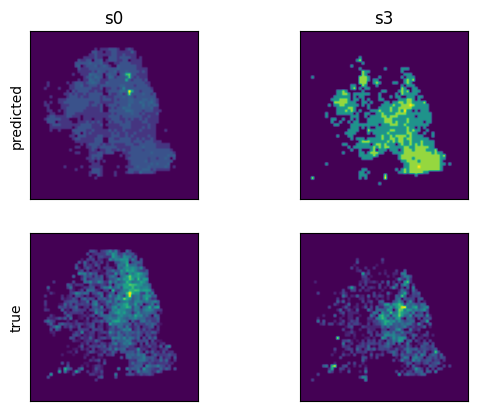

In [39]:
mushroom.display_predicted_pixels(channel='ACTA2')

In [40]:
cluster_ids = mushroom.cluster_ids.cpu().detach().numpy()

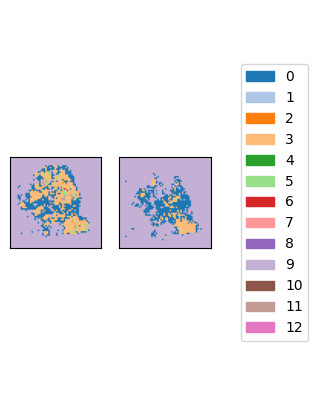

In [41]:
vis_utils.display_clusters(cluster_ids)

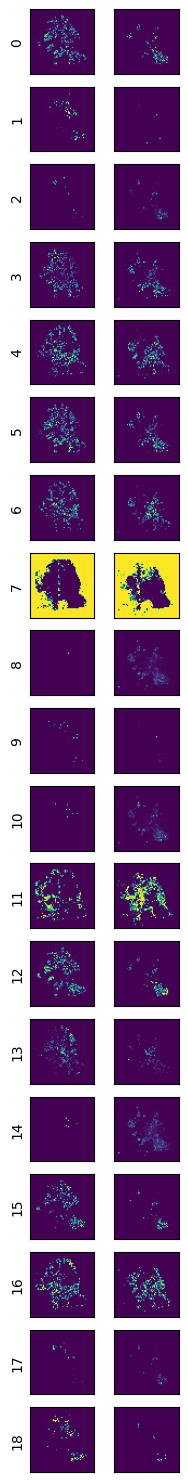

In [26]:
utils.display_cluster_probs(mushroom.cluster_probs)

#### gene set based

In [27]:
exp_df = mushroom.get_cluster_intensities(cluster_ids)
exp_df

,A1BG,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMDC,AAMP,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
0,0.102784,0.182420,0.170917,0.172292,0.143421,0.088626,0.099432,0.129324,0.109930,0.218803,...,0.069722,0.102394,0.089407,0.146154,0.130179,0.164591,0.063949,0.108119,0.254050,0.166682
1,0.307578,0.344138,0.558405,0.507739,0.449278,0.129569,0.422565,0.311240,0.343017,0.594210,...,0.146484,0.307189,0.320867,0.424548,0.519204,0.498297,0.248543,0.322884,0.508397,0.544514
2,0.289739,0.388478,0.665950,0.645921,0.542747,0.036376,0.531369,0.366462,0.476339,0.659706,...,0.124906,0.341084,0.349902,0.459655,0.668651,0.621671,0.213143,0.436963,0.577620,0.701039
3,0.068349,0.174189,0.106041,0.112279,0.093884,0.112434,0.065848,0.115916,0.075908,0.152801,...,0.061538,0.084484,0.065486,0.109650,0.084438,0.118034,0.032429,0.083404,0.197126,0.110732
4,-0.041627,0.080389,-0.037119,-0.042806,-0.051073,0.003098,-0.033264,0.013873,-0.047015,-0.017192,...,-0.005296,-0.029749,-0.021296,-0.034352,-0.039287,-0.024441,-0.045888,-0.036631,0.010263,-0.026745
5,0.081893,0.184980,0.144190,0.143941,0.118579,0.084060,0.081447,0.119456,0.093242,0.185701,...,0.058485,0.089065,0.073038,0.121189,0.104221,0.142063,0.048801,0.095374,0.234167,0.143024
6,-0.010202,0.148996,0.019724,0.019911,0.001403,0.076262,0.010524,0.066762,-0.000849,0.050053,...,0.021600,0.013721,0.015245,0.018312,0.014369,0.038073,-0.024650,0.018033,0.094417,0.032278
7,-0.215970,-0.681175,-0.319010,-0.309543,-0.263838,-0.312564,-0.239275,-0.324466,-0.246294,-0.401024,...,-0.286412,-0.262358,-0.260106,-0.265404,-0.271486,-0.340676,-0.156336,-0.253216,-0.539277,-0.314074
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.748835,0.895385,1.000000,1.000000,1.000000,1.000000
9,0.275462,0.374891,0.622008,0.597971,0.490848,0.056293,0.491019,0.325665,0.392870,0.628997,...,0.113446,0.315561,0.322306,0.439810,0.595345,0.560967,0.229338,0.371639,0.534951,0.659761


/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)

KeyboardInterrupt



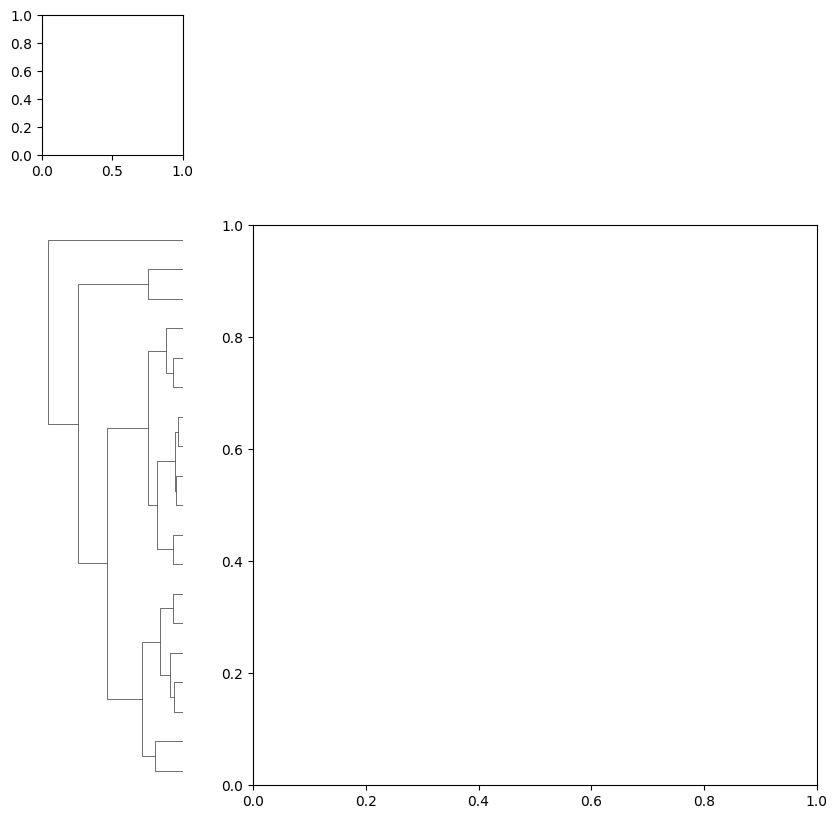

In [28]:
sns.clustermap(exp_df)

#### agglomerative clustering

In [32]:
n_clusters = 20
cluster_to_label, neigh_ids = utils.aggregate_clusters(exp_df, cluster_ids, n_clusters=n_clusters)
len(np.unique(neigh_ids))

ValueError: Cannot extract more clusters than samples: 20 clusters where given for a tree with 19 leaves.

In [ ]:
vis_utils.display_clusters(neigh_ids)

In [262]:
neigh_df = mushroom.get_cluster_intensities(neigh_ids)
neigh_df

,Bap1,CD31,CD45,CD68,CD8,CK14,CK19,COX6c,DAPI,ER,...,Her2,Ki67,MGP,PLAT/tPA,PR,Pan-Cytokeratin,Podoplanin,SMA,Vimentin,cKit
0,0.417650,0.583170,0.813294,0.347576,0.263395,-0.011240,0.573151,0.632172,0.623977,0.482448,...,0.402006,0.904632,0.133981,0.416672,0.687250,0.461736,-0.048297,0.514185,0.784061,0.214555
1,0.573489,0.653515,0.885346,0.513025,-1.109099,0.275467,0.711967,0.692473,0.721880,0.650362,...,0.566589,0.879597,0.307782,0.575566,0.836525,0.616561,0.051392,0.885957,0.328531,0.398289
2,0.021531,0.192265,0.069484,-0.010601,0.256035,0.055517,-0.003194,0.026098,0.078095,-0.000576,...,-0.002210,0.037470,0.017914,0.018993,0.048658,-0.003278,0.029489,0.625035,0.638747,-0.017042
3,0.965915,0.973609,0.991826,0.974413,-3.711929,0.975829,0.986819,0.974762,0.978682,0.984809,...,0.977733,0.686571,0.958464,0.978243,0.995604,0.979806,0.929658,-0.306422,-0.909050,0.966106
4,0.685753,0.750792,0.898170,0.736643,-2.716218,0.726743,0.843229,0.756369,0.789761,0.823636,...,0.765840,0.691688,0.605956,0.770846,0.920700,0.784942,0.380749,0.715997,-0.402231,0.667682


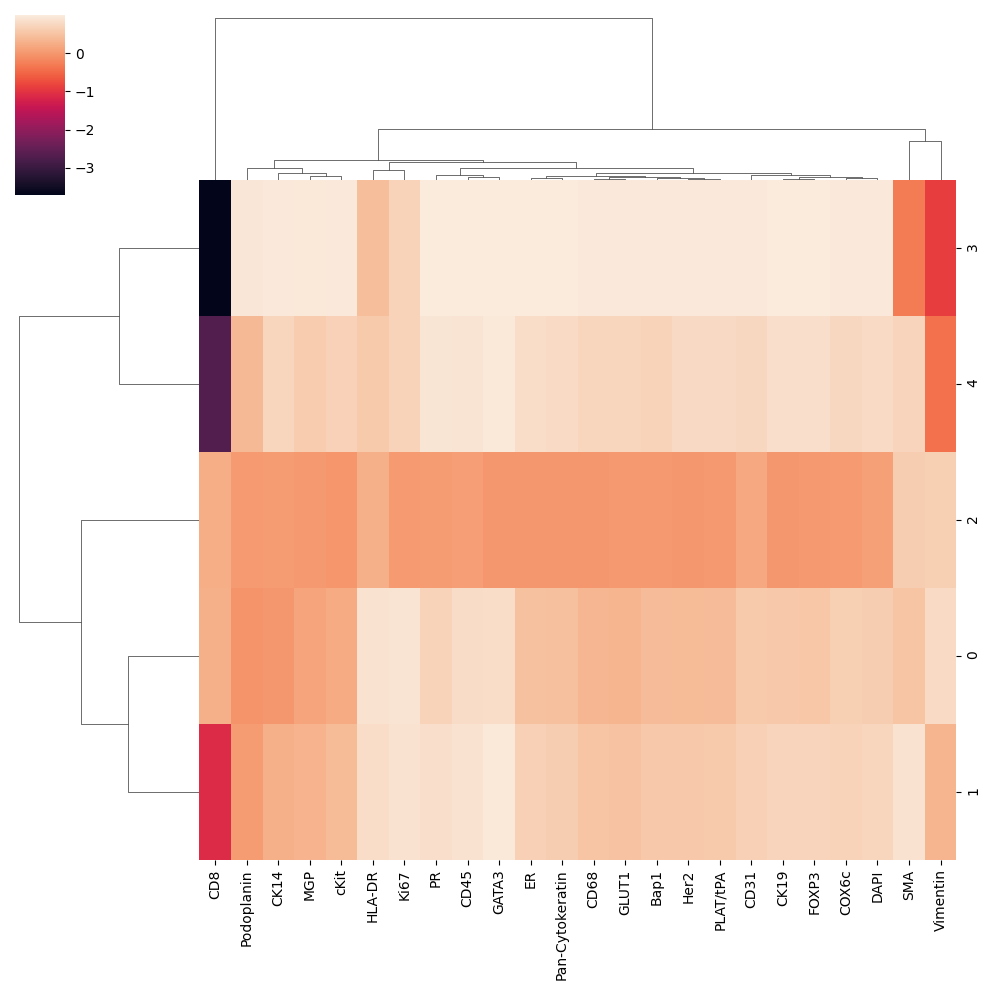

In [263]:
sns.clustermap(neigh_df)

#### interpolation

In [ ]:
section_positions = [0, 12, 21, 31]
neigh_volume = utils.get_interpolated_volume(neigh_ids, section_positions)
neigh_volume.shape

In [ ]:
vis_utils.display_clusters(neigh_volume, horizontal=False)

In [ ]:
probs = rearrange(mushroom.cluster_probs, 'n c h w -> c n h w').cpu().detach().numpy()
probs_volume = utils.get_interpolated_volume(probs, section_positions, method='linear')

In [ ]:
fig, axs = plt.subplots(nrows=probs_volume.shape[1], figsize=(5, probs_volume.shape[1]))
for i, ax in enumerate(axs):
    ax.imshow(probs_volume[0, i])
    ax.axis('off')
    

#### saving

In [ ]:
out_fp = os.path.join(out_dir, 'outputs.npy')
np.save({
    'cluster_ids': cluster_ids,
    'cluster_probs': cluster_probs,
    'neigh_ids': neigh_ids,
    'neigh_volume': 
})
